<a href="https://colab.research.google.com/github/rmishra3-ro/hello-world/blob/main/Copy_of_Copy_of_Challenge_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1 Guide -- The Original Problem


# Setup

In [ ]:
import glob
from google.colab import drive
drive.mount("/content/drive")

data_dir = '/content/drive/My Drive/4152 5152 - 2021 Spring/Colab/01 - The Original Problem/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Copying data from shared folder to your personal google drive

In [ ]:
mkdir /content/drive/My\ Drive/My-ITCS-4152

mkdir: cannot create directory ‘/content/drive/My Drive/My-ITCS-4152’: File exists


In [ ]:
cp -r /content/drive/My\ Drive/4152\ 5152\ -\ 2021\ Spring/Colab/01\ -\ The\ Original\ Problem/data/ /content/drive/My\ Drive/My-ITCS-4152

In [ ]:
# so we can use numpy and matplotlib
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


## Scratch Space

Write your code, try things, before copying to "Your prediction function"

In [ ]:
## Example of loading images
all_image_paths = glob.glob(f'{data_dir}/*/*/*.jpg')
easy_image_paths = glob.glob(f'{data_dir}/easy/*/*.jpg')
medium_image_paths = glob.glob(f'{data_dir}/medium_1/*/*.jpg') + glob.glob(f'{data_dir}/medium_2/*/*.jpg')
hard_image_paths = glob.glob(f'{data_dir}/hard/*/*.jpg')

sample_image = imread(easy_image_paths[13]) # load the 13th easy image

# imshow(sample_image)

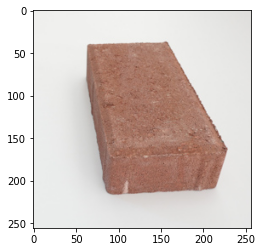

In [ ]:
imshow(sample_image)

# Your prediction function (**this is what you will submit**)

Example student submission for programming challenge. A few things:
1. Modify the classify function in the cell below to reflect your solution
2. Copy paste the contents of the cell into a file on your computer called **firstname_lastname.py**
3. Be sure not to change the name or parameters of the method below, classify(im)
4. In this challenge, you are only permitted to import numpy and methods from 
   the util module in this repository. Note that if you make any changes to your local 
   util module, these won't be reflected in the util module that is imported by the 
   auto grading algorithm. 
5. Anti-plagarism checks will be run on your submission.
6. Feel free to define any local/helper functions in the cell below.

In [ ]:
cd '/content/drive/My Drive/4152 5152 - 2021 Spring/Colab/01 - The Original Problem'

/content/drive/.shortcut-targets-by-id/1KWemi_Ke6Mo6PdOWFnz3C4aH5mEa4Huz/4152 5152 - 2021 Spring/Colab/01 - The Original Problem


In [ ]:
import numpy as np

## 1. It's kk to import whatever you want from the local util module if you would like:
#  You can import functions from util folder like this
from util.filters import roberts_cross
from util.filters import filter_2d
from util.image import convert_to_grayscale

## 2. It is okay do define method outside classify
# ex - 1
def process(im):
    return im/255

# ex - 2
def helper_1(im):
    im_processed = process(im)
    return im_processed

def classify(im):
    '''
    Example submission for coding challenge. 
    
    Args: im (nxmx3) unsigned 8-bit color image 
    Returns: One of three strings: 'brick', 'ball', or 'cylinder'
    
    '''
    #if image size>300, predict it's ball
    size = im.shape
    if(size [0]>300):
      return "ball"
    #convert our image to grayscale
    gray = convert_to_grayscale(im/255);
    im = helper_1(im)
    #size = im.shape
    Kx = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    Ky = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    Gx = filter_2d(gray, Kx)
    Gy = filter_2d(gray, Ky)
    G_magnitude = np.sqrt(Gx ** 2 + Gy ** 2)
    G_direction = np.arctan2(Gy, Gx)
    edges = G_magnitude > 0.8
    img_sum = np.sum(edges==1)

   
    

    labels=["brick","ball","cylinder"]
    
    #predicting what shape is in the image with the calculated max_value and img_sum
    if (img_sum <= 655):
      return labels[1]
    elif  (img_sum <= 1191):
      return labels[2]
    else:
      return labels[0]

    


## 3. Copy - Paste all the code from this cell into a python file when submitting on Autolab.

# Evaluating your code
* This is the script that will evaluate your code on AutoLab
* Your score here may be different than your score in AutoLab
  * This is because AutoLab uses a different, but similar, set of data for testing

Note: **You may want to restart your runtime prior to evaluating to make sure your code will run properly on the AutoLab server**




In [ ]:
import numpy as np
import glob
from easydict import EasyDict
from matplotlib.pyplot import imread
import time

# #Import student's method:
# from sample_student import classify

program_start = time.time()

dataset_names = ['easy', 'medium_1', 'medium_2', 'hard']
weights = [0.5, 0.2, 0.2, 0.1]
classes = ['ball', 'brick', 'cylinder']
data_path = data_dir

dataset_weights = {}
for i in range(len(dataset_names)):
    dataset_weights[dataset_names[i]] = weights[i]

#Store data performance data in a nested easydict:
performance = EasyDict()
total_time = 0

#Iterate through images:
for dataset_name in dataset_names:
    performance[dataset_name] = EasyDict()
    performance[dataset_name]['overall'] = np.array([0, 0]) #overall Correct/incorrect
    
    for image_class in classes:
        performance[dataset_name][image_class] = np.array([0, 0])
        image_paths = glob.glob(data_path + '/' 
                                + dataset_name + '/' 
                                + image_class + '/*.jpg')
        
        for image_path in image_paths:
            im = imread(image_path)
            
            start_time = time.time()
            prediction = classify(im)
            end_time = time.time()
            total_time += (end_time - start_time)
            
            if image_class == prediction:
                performance[dataset_name][image_class][0] += 1
            else:
                performance[dataset_name][image_class][1] += 1
                
        #Tally overall performance for class
        performance[dataset_name]['overall'] = performance[dataset_name]['overall'] \
                                               + performance[dataset_name][image_class]


#Print out errors: 
print('Fraction of Correct Predictions: ')
overall_accuracy = 0
for dataset_name in dataset_names:
    total_correct, total_incorrect = performance[dataset_name]['overall']
    total = total_correct + total_incorrect
    accuracy = np.round(float(total_correct)/total, 4)
    overall_accuracy += accuracy * dataset_weights[dataset_name]
    performance[dataset_name]['accuracy'] = accuracy
    print(dataset_name + ': ' + \
           '(' + str(total_correct) + '/' + str(total) + ' = ' + \
           str(accuracy) + ')')
    
    for image_class in classes:
        print('   ' + image_class + ': '
              + str(performance[dataset_name][image_class][0])
              + '/'
              + str(np.sum(performance[dataset_name][image_class])))

overall_accuracy = np.round(overall_accuracy, 2)
score = 0

if overall_accuracy >= 0.6:
   score = 10
elif overall_accuracy >= 0.55:
   score = 9
elif overall_accuracy >= 0.5:
   score = 8
elif overall_accuracy >= 0.45:
   score = 7
elif overall_accuracy >= 0.4:
   score = 6
elif overall_accuracy >= 0.35:
   score = 5
elif overall_accuracy >= 0:
   score = 4


print("\nOverall Accuracy = ", overall_accuracy)
print("Score = ", score)

program_end = time.time()
complete_time = program_end - program_start
total_time =  round(total_time, 5)
complete_time = round(complete_time, 5)

print("Classification time (seconds): = ", total_time)
print("Program completetion time (seconds): = ", complete_time)

Fraction of Correct Predictions: 
easy: (25/27 = 0.9259)
   ball: 8/9
   brick: 8/9
   cylinder: 9/9
medium_1: (5/12 = 0.4167)
   ball: 2/4
   brick: 3/5
   cylinder: 0/3
medium_2: (3/8 = 0.375)
   ball: 2/3
   brick: 1/2
   cylinder: 0/3
hard: (9/22 = 0.4091)
   ball: 9/9
   brick: 0/8
   cylinder: 0/5

Overall Accuracy =  0.66
Score =  10
Classification time (seconds): =  43.16072
Program completetion time (seconds): =  43.63287
